#ASSIGNMENT 5#


#Training a Multilayer Perceptron on MNIST Dataset.# 

###Step 0: Import libraries

In [1]:
#Importing all the necessary modules/libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Model, Sequential
from keras.layers import Dense , Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras import backend as K
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model

###Step 1: Load the data

In [2]:
#importing the MNIST dataset from keras
from keras.datasets import mnist


#loading the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()


print("Train labels before data processing: \n" , x_train[0])
print("\nTest labels before data processing: \n", x_test[0])

#Counting the number of unique train and test labels
print()
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

print()
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels before data processing: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

###Step 2: Data Pre-Processing 

To ease the process of training the model here, I am normalising the input data to avoid large gradient values. 

In [3]:
#Step 2.1: Dealing with the dimensions of the input data- resizing from N*28*28 to N*784, normalising 

print("Shape of each image in the data is: ", (x_train.shape[1], x_train.shape[2]))

sizeofimage = x_train.shape[1]
sizeofinput = sizeofimage * sizeofimage
X_train = np.reshape(x_train, [-1, sizeofinput])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(x_test, [-1, sizeofinput])
X_test = X_test.astype('float32') / 255

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Shape of each image in the data is:  (28, 28)
Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


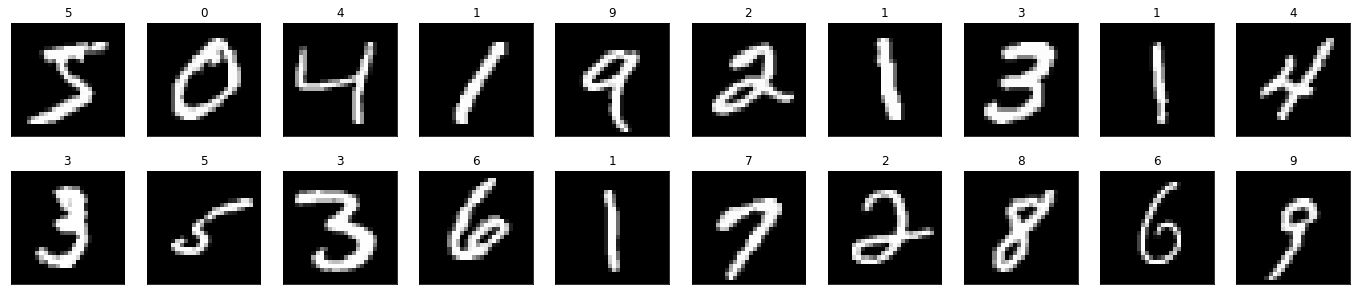

In [4]:
#Visualising the data
# Plotting the images in the batch with their labels
fig = plt.figure(figsize=(24, 5))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(X_train[idx].reshape(28, 28), cmap='gray')
    ax.set_title(str(y_train[idx]))

#*784 pixel values in range [0-1] describing what zero looks like:* 

784 pixel values in range [0-1] describing what zero looks like:  



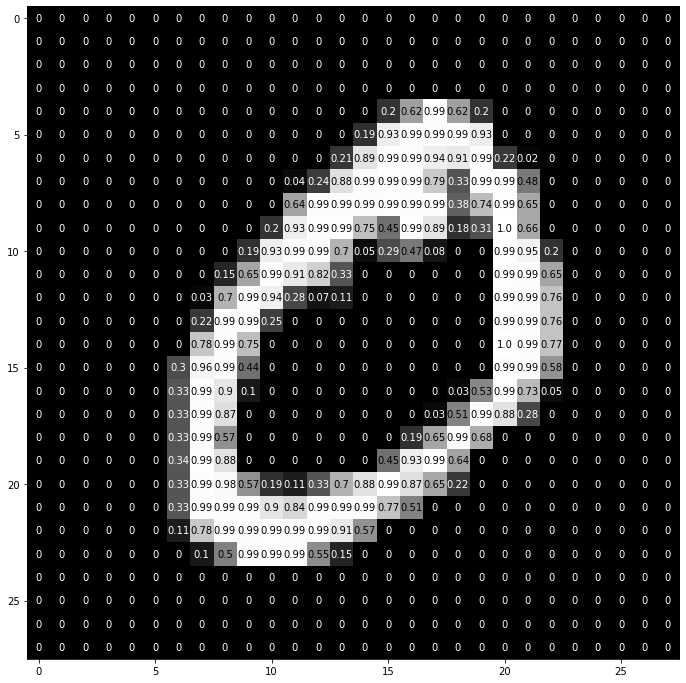

In [5]:
img = X_train[1].reshape(28, 28)


print("784 pixel values in range [0-1] describing what zero looks like:  \n")

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
threshold = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<threshold else 'black')

In [6]:
#Step 2.2: Converting the digits to hot-one vector

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

###Step 3: Divide dataset into Train/Test set

Dataset was divided into train and test sets while loading the data itself, above in step 1, line 6.  

In [7]:
#Displaying the train and test set after processing the data

print("Training labels: \n" , X_train[0])

print("\nTest labels: \n", X_test[0])

Training labels: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

###Step 4 and 5: Building a Simple Dense Network , Using ReLu and Softmax as activation functions 

In [8]:
#Initilaising some network parameters 
num_classes = 10
epochs = 30
batch_size = 64


#ReLu,Softmax are activation functions, and dropout after each layer
model = Sequential()
model.add(Dense(800, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
earlystopping=[EarlyStopping(monitor='loss', patience=5, verbose=1, mode='auto')]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 731,818
Trainable params: 731,818
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Using the SGD method to update the weights
sgd = SGD(learning_rate=0.01, decay=0, momentum=0.9, nesterov=False)

###Step 6, 8, 11: Compile loses using optimization parameters, plotting the curves and reporting the accuracy

The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).

In [11]:
#Compiling loses using sgd, Adam and RMSprop optimisers

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

###Fitting the model:

In [12]:
history = model.fit(X_train, y_train,
                    batch_size=200, 
                    epochs=20,  
                    verbose=1,
                    validation_data=(X_test, y_test) ,
                    callbacks=earlystopping)

# list all data in history

print(history.history.keys())

Epoch 1/20
300/300 [==============================] - 8s 22ms/step - loss: 1.5262 - accuracy: 0.5385 - val_loss: 0.7212 - val_accuracy: 0.8466
Epoch 2/20
300/300 [==============================] - 6s 20ms/step - loss: 0.7715 - accuracy: 0.7713 - val_loss: 0.4650 - val_accuracy: 0.8796
Epoch 3/20
300/300 [==============================] - 6s 20ms/step - loss: 0.6001 - accuracy: 0.8179 - val_loss: 0.3878 - val_accuracy: 0.8945
Epoch 4/20
300/300 [==============================] - 6s 20ms/step - loss: 0.5202 - accuracy: 0.8457 - val_loss: 0.3458 - val_accuracy: 0.9035
Epoch 5/20
300/300 [==============================] - 6s 20ms/step - loss: 0.4708 - accuracy: 0.8592 - val_loss: 0.3180 - val_accuracy: 0.9104
Epoch 6/20
300/300 [==============================] - 6s 20ms/step - loss: 0.4339 - accuracy: 0.8718 - val_loss: 0.2968 - val_accuracy: 0.9155
Epoch 7/20
300/300 [==============================] - 6s 20ms/step - loss: 0.4056 - accuracy: 0.8807 - val_loss: 0.2811 - val_accuracy: 0.9210

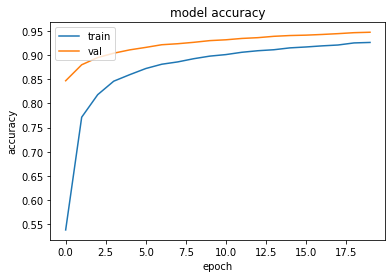

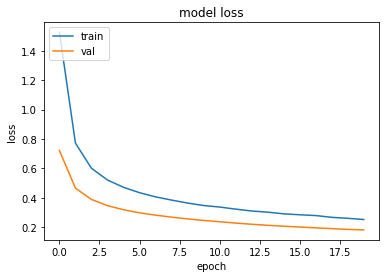

In [13]:
###Step 6: Plotting loss and accuracy learning curves
#Plotting curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
#Step 11: Reporting accuracy of the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1806 - accuracy: 0.9468
Test loss: 0.18059305846691132
Test accuracy: 0.9467999935150146


In [15]:

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [16]:
history = model.fit(X_train, y_train,
                    batch_size=200, 
                    epochs=20,  
                    verbose=1,
                    validation_data=(X_test, y_test) ,
                    callbacks=earlystopping)

# list all data in history

print(history.history.keys())

Epoch 1/20
300/300 [==============================] - 7s 23ms/step - loss: 0.2089 - accuracy: 0.9377 - val_loss: 0.1054 - val_accuracy: 0.9672
Epoch 2/20
300/300 [==============================] - 6s 21ms/step - loss: 0.1326 - accuracy: 0.9595 - val_loss: 0.0867 - val_accuracy: 0.9726
Epoch 3/20
300/300 [==============================] - 11s 36ms/step - loss: 0.1048 - accuracy: 0.9678 - val_loss: 0.0724 - val_accuracy: 0.9762
Epoch 4/20
300/300 [==============================] - 10s 32ms/step - loss: 0.0894 - accuracy: 0.9715 - val_loss: 0.0653 - val_accuracy: 0.9806
Epoch 5/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0788 - accuracy: 0.9750 - val_loss: 0.0672 - val_accuracy: 0.9806
Epoch 6/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0693 - accuracy: 0.9780 - val_loss: 0.0701 - val_accuracy: 0.9784
Epoch 7/20
300/300 [==============================] - 6s 21ms/step - loss: 0.0606 - accuracy: 0.9806 - val_loss: 0.0600 - val_accuracy: 0.98

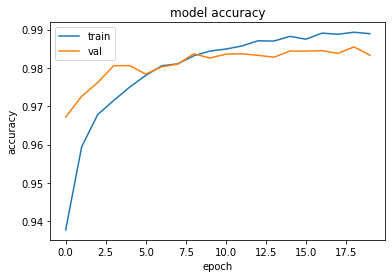

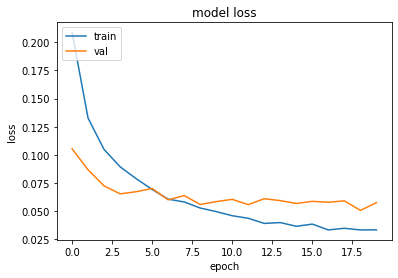

In [17]:
###Step 6: Plotting loss and accuracy learning curves
#plotting curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
#Step 11: Reporting accuracy of the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0575 - accuracy: 0.9833
Test loss: 0.05749838799238205
Test accuracy: 0.983299970626831


In [19]:

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train,
                    batch_size=200, 
                    epochs=20,  
                    verbose=1,
                    validation_data=(X_test, y_test) ,
                    callbacks=earlystopping)

# list all data in history

print(history.history.keys())

Epoch 1/20
300/300 [==============================] - 9s 28ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0672 - val_accuracy: 0.9855
Epoch 2/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 0.0704 - val_accuracy: 0.9861
Epoch 3/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0732 - val_accuracy: 0.9863
Epoch 4/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0697 - val_accuracy: 0.9874
Epoch 5/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0809 - val_accuracy: 0.9864
Epoch 6/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0854 - val_accuracy: 0.9862
Epoch 7/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0844 - val_accuracy: 0.9857

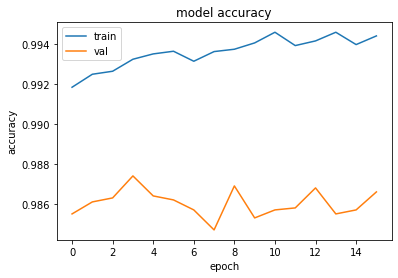

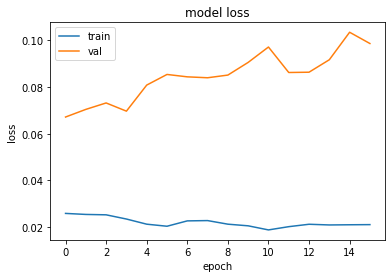

In [21]:
###Step 6: Plotting loss and accuracy learning curves
#Plotting curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
#Step 11: Reporting accuracy of the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0987 - accuracy: 0.9866
Test loss: 0.09867991507053375
Test accuracy: 0.9865999817848206


###Step 7: What is the value of learning_rate when loss shoots up? 

In [23]:
#If learning rate is set too low, training will progress very slowly 
#as very tiny updates are made to the weights in thenetwork. 
#However, if thelearning rate is set too high, it can cause undesirable divergent behavior in the loss function.

###Step 10: Create checkpoint

In [24]:
#path_checkpoint = "training_1/cp.ckpt"
#directory_checkpoint = os.path.dirname(path_checkpoint)

#callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
#                                                 save_weights_only=True,
#                                                 verbose=1)

#model.fit(X_train, 
#          y_test,  
#          epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[callback]) 